# Assignment 1 (Diabetes Prediction) - Agustin Balce

# Import Setup





In [10]:
# Import required libraries
import sklearn.datasets as skldatasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import google.colab.files as gcf
import missingno as mno
from sklearn.metrics import accuracy_score as sk_accuracy_score

# Data Upload and Extraction

In [11]:
gcf.upload()
#select diabetes file from the content folder
diabetes_percept = pd.read_csv('/content/diabetes.csv')

Saving diabetes.csv to diabetes (1).csv


# Data Preparation and Display Data

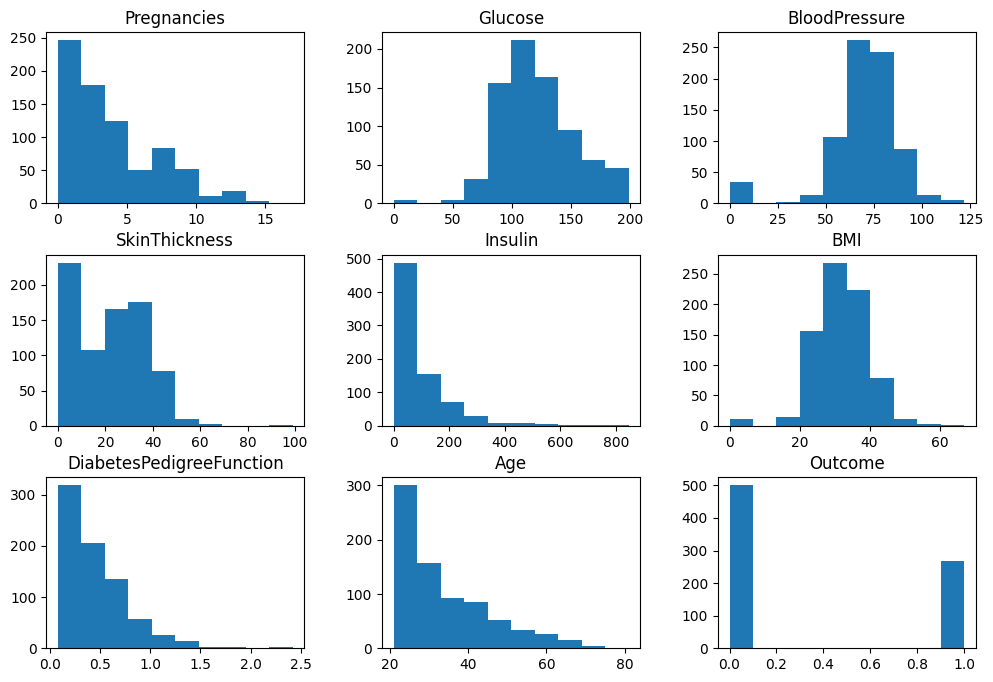

In [12]:
diabetes_1 = diabetes_percept.hist(figsize=(12,8),grid=False)

In [13]:
#reading the data
diabetes_percept.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes_percept.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [15]:
diabetes_percept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

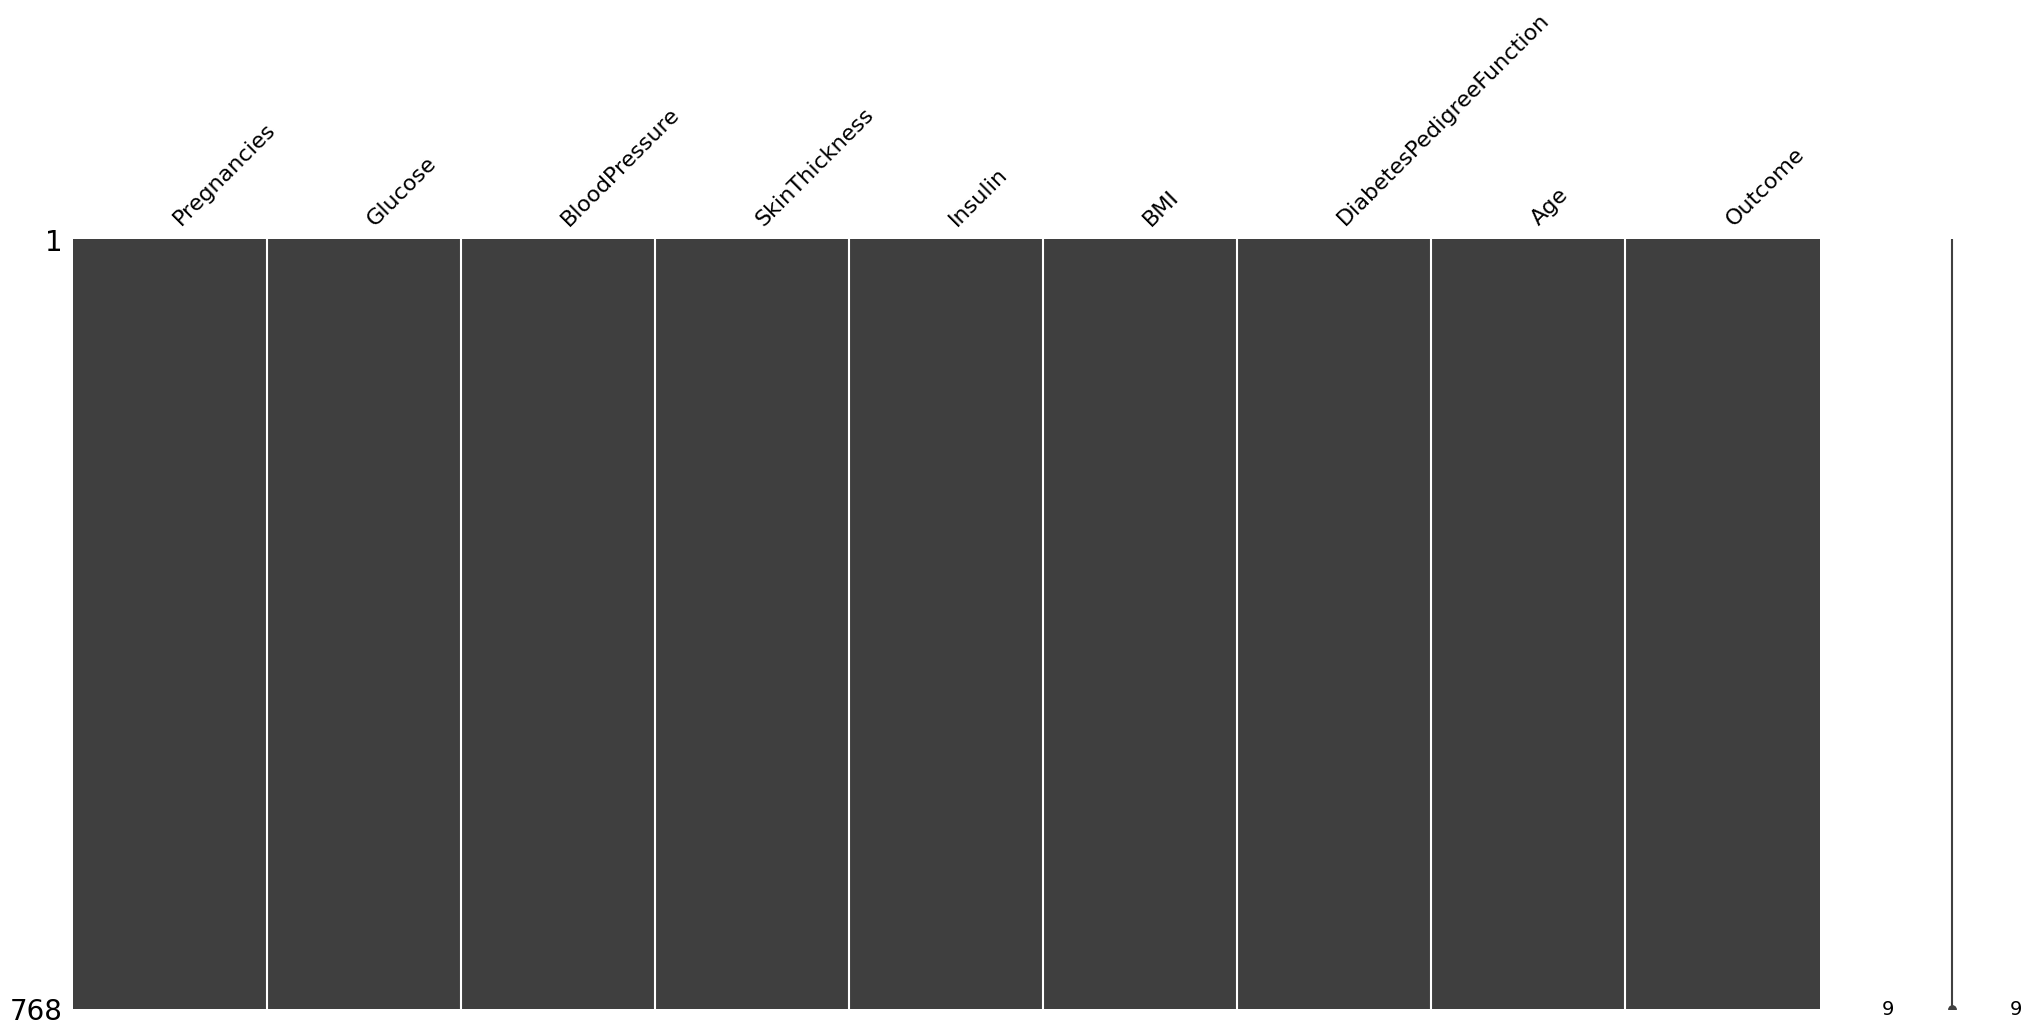

In [16]:
#checking for missing values
mno.matrix(diabetes_percept)

In [17]:
# Data cleaning and handling zero values
print(diabetes_percept.dtypes)
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
column_means = diabetes_percept[numeric_columns].mean()
diabetes_percept[numeric_columns] = diabetes_percept[numeric_columns].replace(0, column_means)
data_features = np.array(diabetes_percept.columns)
print(data_features)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [18]:
print(diabetes_percept)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

# Generating Test and Training Sets

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'diabetes' is your dataset

# Splitting the data into features and target
X = diabetes_percept.drop(columns=[data_features[-1]])
y = np.where(diabetes_percept[data_features[-1]] == 0, -1, 1)

# Splitting the data into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (652, 8)
y_train shape: (652,)
X_test shape: (116, 8)
y_test shape: (116,)


# Mathematical Formula

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

# Implementing Perceptron Algorithm

In [25]:
class CustomPerceptron:

    def __init__ (self):

        self.weight = None
        self.bias = None

    def function(self, x):
        return 1 if (np.dot(self.weight, x) >= self.bias) else -1

    def predict_y(self, X):
        Y = []
        for x in X:
            result = self.function(x)
            Y.append(result)
        return np.array(Y)
    def fit(self, X, Y, epochs=1, learning_rate=1):
      self.weight = np.ones(X.shape[1])
      self.bias = 0

      max_accuracy = 0
      weight_matrix = []
      accuracies = []  # Use a list instead of a dictionary

      for i in range(epochs):

        for x, y in zip(X, Y):
            y_pred = self.function(x)
            if y == 1 and y_pred == -1:
                self.weight += learning_rate * x
                self.bias -= learning_rate
            elif y == -1 and y_pred == 1:
                self.weight -= learning_rate * x
                self.bias += learning_rate

        weight_matrix.append(np.copy(self.weight))  # Store a copy
        curr_accuracy = accuracy_score(Y, self.predict_y(X))
        accuracies.append(curr_accuracy)

        if curr_accuracy > max_accuracy:
            max_accuracy = curr_accuracy
            checkpoint_weight = np.copy(self.weight)
            checkpoint_bias = self.bias
            best_epoch = i  # Renamed 'j' to 'best_epoch' for clarity

      self.weight = checkpoint_weight
      self.bias = checkpoint_bias

      print(f"Best Accuracy: {max_accuracy} at Epoch: {best_epoch}")
      plt.plot(accuracies)
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.ylim([0, 1])
      plt.show()
      return np.array(weight_matrix)

In [26]:
percept = CustomPerceptron()

Best Accuracy: 0.7515337423312883 at Epoch: 5


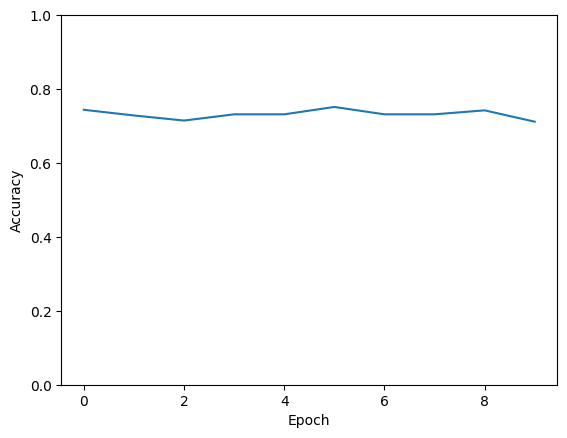

In [27]:
weight_history = percept.fit(X_train, y_train, 10, 0.7)

In [29]:
Y_pred_test = percept.predict_y(X_test)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the final model
conf_matrix = confusion_matrix(y_test, Y_pred_test)
accuracy = accuracy_score(y_test, Y_pred_test)
precision = precision_score(y_test, Y_pred_test)
recall = recall_score(y_test, Y_pred_test)
f1 = f1_score(y_test, Y_pred_test)

print('Confusion Matrix:\n', conf_matrix)
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1 Score: {3:.4f}'.format(accuracy, precision, recall, f1))


Confusion Matrix:
 [[61 15]
 [11 29]]
Accuracy: 0.7759, Precision: 0.6591, Recall: 0.7250, F1 Score: 0.6905


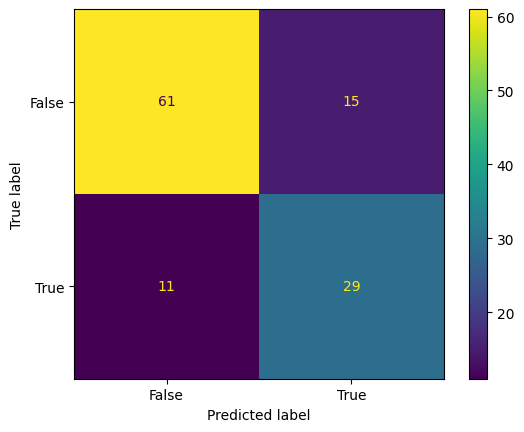

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred_test)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


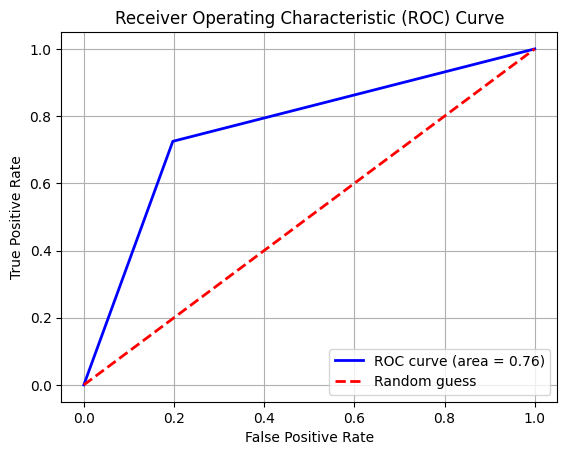

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', lw=2, label='Random guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()